In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

### Utilities

In [35]:
def normalize(x):
    return x / np.sqrt(np.dot(x.T, x))

def spherical_to_cartesian(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return np.array([x,y,z])

### Different Sampling Methods

In [3]:
def cosine_sphere_sample():
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    
    theta = 4 * np.pi * np.arcsin(np.sqrt(r1))
    phi = 2 * np.pi * r2

    return spherical_to_cartesian(theta, phi)

In [4]:
def cosine_hemisphere_sample():
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    
    theta = np.arcsin(np.sqrt(r1))
    phi = 2 * np.pi * r2
    
    return spherical_to_cartesian(theta, phi)

In [5]:
def cosine_quartersphere_sample():
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    
    theta = np.arcsin(np.sqrt(r1))
    phi = np.pi * r2
    
    return spherical_to_cartesian(theta, phi)

In [6]:
def uniform_sphere_sample():
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    
    theta = np.arccos(2.0 * r1 - 1.0)
    phi = 2 * np.pi * r2
    
    return spherical_to_cartesian(theta, phi)

In [64]:
def length(vec):
    return np.sqrt(np.dot(vec, vec))

def light_sphere_sampling(center, radius):
    
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    x = 0
    
    cache = np.sqrt(1 - np.square(radius / length(x - center)))
    
    theta = np.arccos(1 - r1 + r1 * cache)
    phi = 2 * np.pi * r2
    
    return spherical_to_cartesian(theta, phi)

### Compute a rotation matrix that transform samples to given normal

In [41]:
def make_local_frame(normal):
    if (abs(normal[0]) > abs(normal[1])):
        Nt = np.array([normal[2], 0, -normal[0]]) / np.sqrt(normal[0] * normal[0] + normal[2] * normal[2])
    else:
        Nt = np.array([0, -normal[2], normal[1]]) / np.sqrt(normal[1] * normal[1] + normal[2] * normal[2])
        
    Nb = np.cross(Nt, normal)
    
    return np.array([
        Nt,
        Nb,
        normal
    ])

### Transform samples to given normals according to given weights

In [8]:
def multi_normals(samples, weights, normals):
    
    assert np.allclose(np.sum(weights), 1.0), 'weights should sum to 1'
    assert len(weights) == len(normals), 'should have same number of normals and weights'
    
    n_samples = len(samples)
    
    for i in range(len(weights)):
        
        start = int(n_samples * np.sum(weights[:i]))
        end = int(n_samples * np.sum(weights[:i+1]))
        normal = normalize(normals[i])
        
        samples[start:end] = np.dot(samples[start:end], make_local_frame(normal))
        
    return samples

### Plot Normals Example

<IPython.core.display.Javascript object>


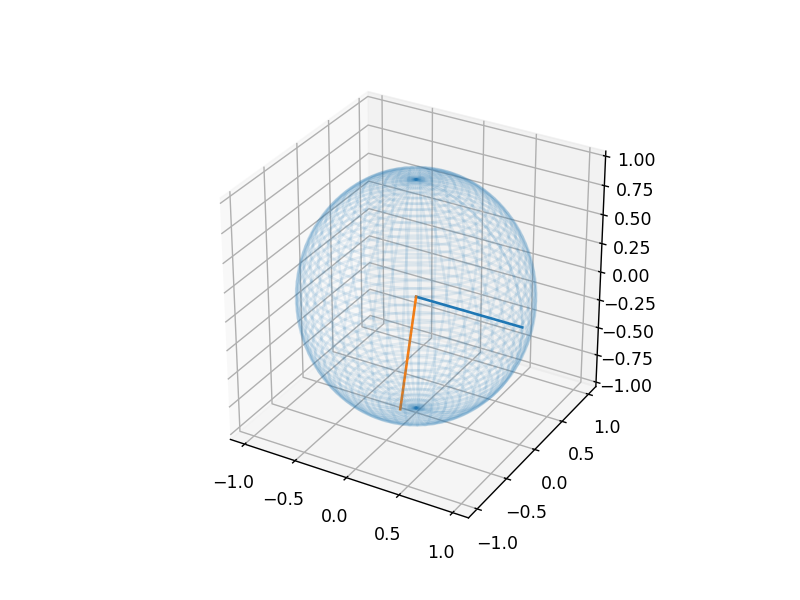

In [9]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))

# plot circle wire frame
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xyz = spherical_to_cartesian(v, u)
ax.plot_wireframe(xyz[0], xyz[1], xyz[2], alpha=0.1)

# plot normals
normals = np.array([
    normalize([1, 0, 0]),
    normalize([-0.1, -0.1, -1])
])

for normal in normals:
    ax.plot(*np.vstack((normal, np.zeros(3))).T)

### 3D Sphere Sampling Example

<IPython.core.display.Javascript object>


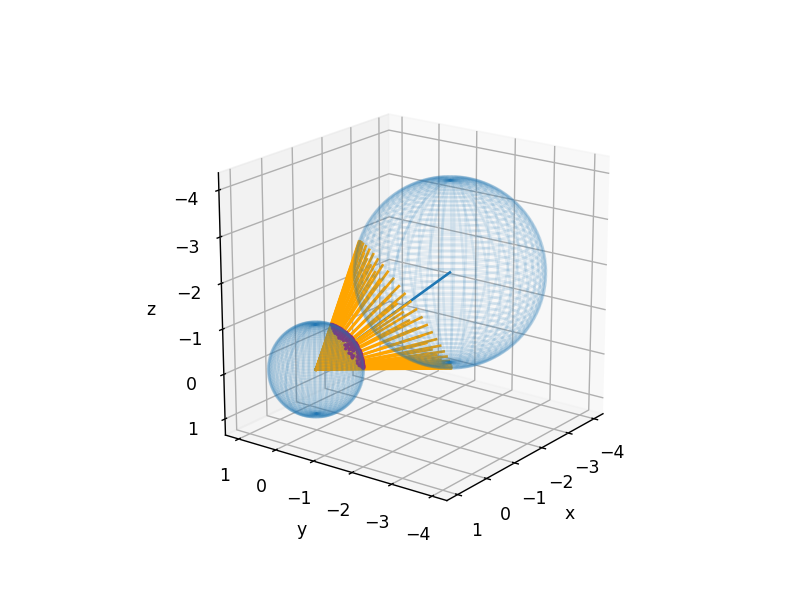

Text(0.5, 0, 'z')

In [80]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))

# plot circle wire frame
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xyz = spherical_to_cartesian(v, u)
ax.plot_wireframe(xyz[0], xyz[1], xyz[2], alpha=0.1)

# sampling hyperparameters 
n_samples = 300
rgb_color = (173/255, 35/255, 106/255)  # a nice purple-ish color
circle_size = 1  # size of each sample on the plot

center = np.array([-2, -2, -2])
radius = 2

# sample and scatter plot
samples = np.vstack([light_sphere_sampling(center, radius) for _ in range(n_samples)])

# face normal
samples = np.dot(samples, make_local_frame(normalize(center)))

# plot samples
ax.scatter(*samples.T, color=rgb_color, s=circle_size)

# plot line to sphere center
ax.plot([0, center[0]], [0, center[1]], [0, center[2]])

# plot sphere
sphere = xyz * radius + center.reshape(-1, 1, 1)
ax.plot_wireframe(sphere[0], sphere[1], sphere[2], alpha=0.1)


theta = np.arccos(np.sqrt(1 - np.square(radius / length(0 - center))))
len2a_max = radius / np.tan(theta)
for r2 in np.linspace(0, 1, 50):
    phi = r2 * 2 * np.pi
    xyz = spherical_to_cartesian(theta, phi) * len2a_max
    xyz = np.dot(xyz, make_local_frame(normalize(center)))
    plt.plot([0, xyz[0]], [0, xyz[1]], [0, xyz[2]], color='orange')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### 3D Sample Plot Example

<IPython.core.display.Javascript object>


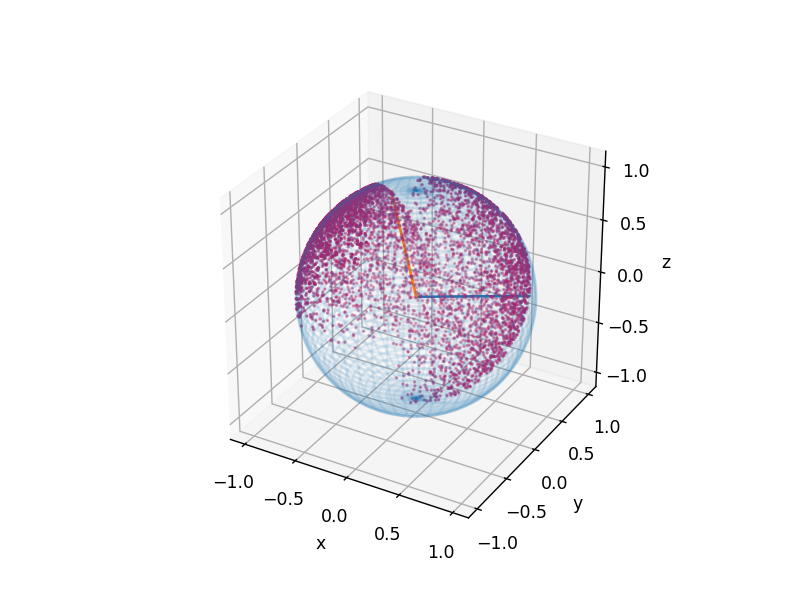

Text(0.5, 0, 'z')

In [10]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))

# plot circle wire frame
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xyz = spherical_to_cartesian(v, u)
ax.plot_wireframe(xyz[0], xyz[1], xyz[2], alpha=0.1)

# sampling hyperparameters 
n_samples = 5000
rgb_color = (173/255, 35/255, 106/255)  # a nice purple-ish color
circle_size = 1  # size of each sample on the plot

# sample_method = uniform_sphere_sample
sample_method = cosine_quartersphere_sample
# sample_method = cosine_hemisphere_sample
# sample_method = cosine_sphere_sample

# sample and scatter plot
samples = np.vstack([sample_method() for _ in range(n_samples)])

# tilt to different normals by weight
normals = [[1, 1, -0.2], [-1, 1, 1]]
weights = [0.5, 0.5]

samples = multi_normals(samples, weights, normals)

# plot normals
for normal in normals:
    ax.plot(*np.vstack((normalize(normal), np.zeros(3))).T)

# plot samples
ax.scatter(*samples.T, color=rgb_color, s=circle_size)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>


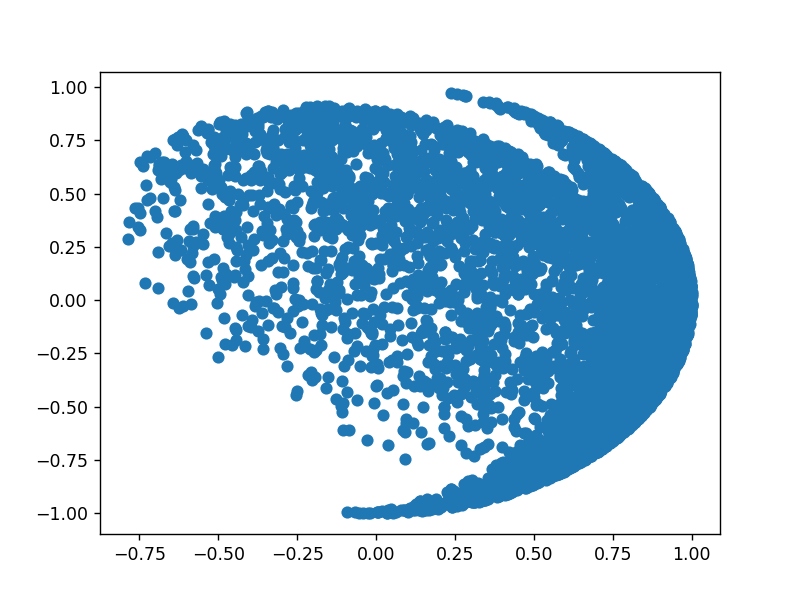

In [11]:
plt.figure()
plt.scatter(samples[:, 1], samples[:, 2])